# Sentence Embeddings using Siamese BERT-Networks
---



## Install Sentence Transformer Library

In [3]:
# Install the library using pip
!pip install sentence-transformers

     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 1.3MB 7.5MB/s 
     |████████████████████████████████| 1.1MB 46.3MB/s 
     |████████████████████████████████| 2.9MB 43.4MB/s 
     |████████████████████████████████| 890kB 25.3MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.9-cp36-none-any.whl size=101034 sha256=2b631f0105d9532a0dca3118c860218374ef6c2e178c397c385c7b7160696f6d
  Stored in directory: /root/.cache/pip/wheels/fc/89/43/f2f5bc00b03ef9724b0f6254a97eaf159a4c4ddc024b33e07a
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=5782fc3806f57c984e7c1f179f523a2ca17bcf4c2a2ac0c86d97e52a29648b4a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


## Load the BERT Model

In [76]:
from sentence_transformers import SentenceTransformer

# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 
# Semantic Textual Similarity are available https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/sts-models.md

model = SentenceTransformer('bert-large-nli-stsb-mean-tokens')

## Setup a Corpus

In [23]:
# What-is-machine-learning?
sentences_machine_learning = [
                          
  'Suggested: Machine Learning (ML) can be explained as automating and improving the learning process of computers based on their experiences without being actually programmed i.e. without any human assistance. The process starts with feeding good quality data and then training our machines(computers) by building machine learning models using the data and different algorithms. The choice of algorithms depends on what type of data do we have and what kind of task we are trying to automate. Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks. For simple tasks assigned to computers, it is possible to program algorithms telling the machine how to execute all steps required to solve the problem at hand; on the computers part, no learning is needed. For more advanced tasks, it can be challenging for a human to manually create the needed algorithms. In practice, it can turn out to be more effective to help the machine develop its own algorithm, rather than having human programmers specify every needed step.',
   #corrrect
  'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
  'Machine Learning is a sub-area of artificial intelligence, whereby the term refers to the ability of IT systems to independently find solutions to problems by recognizing patterns in databases. In other words: Machine Learning enables IT systems to recognize patterns on the basis of existing algorithms and data sets and to develop adequate solution concepts.',
  'Think of ML as a recipe to learn an algorithm. The recipe is: Learn from past experience of tasks Continue to carry out tasks Raise performance with each experience gained How to raise performance with increasing experience is the algorithm it teaches itself with the help of the recipe. A machine is said to learn if and only if it increases it is performance with each gaining experience',
  'Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention. Because of new computing technologies, machine learning today is not like machine learning of the past. It was born from pattern recognition and the theory that computers can learn without being programmed to perform specific tasks; researchers interested in artificial intelligence wanted to see if computers could learn from data. ',
  'Machine learning invariably refers to a family of mathematical techniques and computational algorithms used to ‘learn’ from ‘data’. There are several terms that deserve an amplification. Data. It’s impossible to provide an axiomatic definition to the term data. The term information may be used as a synonym for data but again, that doesn’t say very much (circular arguments never got me very far.) You may think of data as a spreadsheet, a collection of pictures, audio recording, collection of videos, data residing in bank’s credit-card transactions database, the bytes on your hard-disk and so on.',
  'Machine Learning is actually a game of data. If you can play with data then you can master Machine Learning. For Example, if you have spent your childhood in some city say Kolkata then it must be obvious that you know all the places in Kolkata. Now if someone asks you about places in Kolkata then you will be able to answer him/her with the maximum confidence that you have. Relating this example I can say that the experiences of your childhood was the training process (training data) with which you have learned and the person who was asking you was testing on you (test data) and your answer was checked if it was right or wrong in percentage(accuracy rate).',
  'Is a process of enabling a computer based system to learn to do tasks based on well defined statistical and mathematical methods The ability to do the tasks come from the underlying model which is the result of the learning process. Sometimes the ability comes from an mathematical algorithm The model generated represents behavior of the processes that were earlier performed before machine learning The model is generated from huge volume of data, huge both in breadth and depth reflecting the real world in which the processes are performed The more representative data is of the real world, the better the model would be. The challenge is how to make it a true representative',
  'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
  'Machine learning is the art and science to making dumb computers really smart at predicting things and taking necessary step to induce a positive outcome. In simple words you feed some data to the machine along with the results and it learns the pattern in the input variables that led to those specific outcomes, and hence apply these learnings to input data for which we may not know the outcome. This is a very specific type of learning it called supervised learning.',
  'It is how you make computer programs learn something meaningful from data given to it without being explicitly programmed for it. Behind the scenes, it is clever maths that ensures that program converges to a point where it can be safely assumed that program has accurately understood the relationship that input data may hold within. The premise is that a set of inputs samples (corresponding to a given phenomenon) may hold some some hidden pattern which otherwise is unnoticeable by humans. And in case there truly is no pattern in the input data, maths ensures that program never converges or converges poorly.',
  #Related
  'Natural Language Processing (aka NLP) is a field of Artificial Intelligence focused on the ability of the machines to comprehend language and interpret messages. In more strict business terms, NLP can be characterized as: a set of algorithms designed to explore, recognize and utilize text-based information and identify insights for the benefit of the business operation As such, natural language processing and generation algorithms form a backbone for the majority of computerized processes.',
  'Natural language processing (NLP) describes the interaction between human language and computers. It is a technology that many people use daily and has been around for years, but is often taken for granted. Some aspects of NLP include text-to-speech or speech-to-text conversion; machine translation from one language to another; categorizing, indexing, and summarizing written documents; and identifying mood and opinions within text- and voice-based data.',
  'NLP is the process of producing meaningful phrases and sentences in the form of natural language. It is the subfield of artificial intelligence and has great importance in the field of machine learning. It is related to human-computer interaction and helps computers to understand, interpret and manipulate human language. NLP eliminated communication barriers between humans and computers by translating machine language into human language. Today natural language processing is a widely used technology.',
  'Artificial intelligence aims at making expert systems. Expert system are like what we human do, we predict an outcome based on the judgement which is collected through sensors and acted upon by effectors. Now these are terminologies commonly used say you are watching Netflix. It senses the genre you are interested in by firstly asking the preference and then mapping it to similar series you watch and here effectors are the movie choice cards that are displayed.',
  'Artificial Intelligence is one of the most talked technologies these days. No business is left untouched from this advanced technology. From automated cars to conversational chatbots, AI has made our lives a lot simpler and automated. The usage and implementation of AI is being explored in almost all industry verticals, in simpler words, AI is everywhere and ruling the technological world, and with this, there is tremendous growth in the demand for AI development companies',
  'Artificial intelligence is the theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages. It’s a fast-paced and challenging field that is making visible inroads into our everyday life. Natural language processing of the type used in smartphones or Google Translate has become commonplace.',
  'Tensorflow develops a “computational graph” object that represents the expression. A “session” object actually runs the graph, calculating the output of the expression, calculating gradients, and performing a variety of gradient-related operations. The key thing to observe is that a Tensorflow tensor (at the Python level) is not itself an array of numbers. It is an object that will eventually correspond to such an array once it is run through a session. ',
  'Python is a general-purpose interpreted, interactive, object-oriented, and high-level programming language. It supports functional and structured programming methods as well as OOP. It can be used as a scripting language or can be compiled to byte-code for building large applications.',
  'As a statistician I’ve used both effectively. I’ve also sometimes used a #2 pencil and a sheet of paper to solve stat problems (I prefer Blackwing pencils, they are far superior over any other pencil…let’s get that controversy going). Sometimes I’ve used ggplot in R to create dramatic visualizations, but I’ve also used colored pens and a napkin to illustrate a point effectively over a beer to a colleague. I’ve used Python effectively to extract data from the ‘net but I’ve also hand entered data for analysis.',
  'This is one of the most popular libraries for deep learning. I like it because of its clean design, and its quite intuitive. It is not something like Keras, you actually have to write more code, but at the same time you can do more fine adjusting than in Keras, maybe not much more because most things can be done in both, but its simpler to do in Pytorch.',
  #Unrelated
  'The University of Oxford (legally The Chancellor, Masters and Scholars of the University of Oxford) is a collegiate research university in Oxford, Oxfordshire, England. There is evidence of teaching as early as 1096,[2] making it the oldest university in the English-speaking world, the worlds second-oldest university in continuous operation and one of the most prestigious academic institutions in the world.[2][10][11] It grew rapidly from 1167 when Henry II banned English students from attending the University of Paris.[2] After disputes between students and Oxford townsfolk in 1209, some academics fled north-east to Cambridge where they established what became the University of Cambridge.[12] The two English ancient universities share many common features and are often jointly called Oxbridge.',
  'Students successful in early examinations are rewarded by their colleges with scholarships and exhibitions, normally the result of a long-standing endowment, although since the introduction of tuition fees the amounts of money available are purely nominal. Scholars, and exhibitioners in some colleges, are entitled to wear a more voluminous undergraduate gown; "commoners" (originally those who had to pay for their "commons", or food and lodging) are restricted to a short, sleeveless garment. The term "scholar" in relation to Oxford therefore has a specific meaning as well as the more general meaning of someone of outstanding academic ability. In previous times, there were "noblemen commoners" and "gentlemen commoners", but these ranks were abolished in the 19th century. "Closed" scholarships, available only to candidates who fitted specific conditions such as coming from specific schools, ',
  'Political science is a social study concerning the allocation and transfer of power in decision making, the roles and systems of governance including governments and international organizations, political behaviour and public policies. They measure the success of governance and specific policies by examining many factors, including stability, justice, material wealth, peace and public health. Some political scientists seek to advance positive (attempt to describe how things are, as opposed to how they should be) theses by analysing politics. Others advance normative theses, by making specific policy recommendations. The study of politics and policies can be closely connected, for example in comparative analyses of which types of political institutions tend to produce certain types of policies.[6]',
  'Gandhi became a leading figure in the Indian home-rule movement. Calling for mass boycotts, he urged government officials to stop working for the Crown, students to stop attending government schools, soldiers to leave their posts and citizens to stop paying taxes and purchasing British goods.',
  'Electricity is all around us--powering technology like our cell phones, computers, lights, soldering irons, and air conditioners. It is tough to escape it in our modern world. Even when you try to escape electricity, it is still at work throughout nature, from the lightning in a thunderstorm to the synapses inside our body. But what exactly is electricity? This is a very complicated question, and as you dig deeper and ask more questions, there really is not a definitive answer, only abstract representations of how electricity interacts with our surroundings.',
  

]

In [24]:
# # What is an Asset?
# sentences_machine_learning = [
                          
#   'Suggested: Machine Learning (ML) can be explained as automating and improving the learning process of computers based on their experiences without being actually programmed i.e. without any human assistance. The process starts with feeding good quality data and then training our machines(computers) by building machine learning models using the data and different algorithms. The choice of algorithms depends on what type of data do we have and what kind of task we are trying to automate. Machine learning involves computers discovering how they can perform tasks without being explicitly programmed to do so. It involves computers learning from data provided so that they carry out certain tasks. For simple tasks assigned to computers, it is possible to program algorithms telling the machine how to execute all steps required to solve the problem at hand; on the computers part, no learning is needed. For more advanced tasks, it can be challenging for a human to manually create the needed algorithms. In practice, it can turn out to be more effective to help the machine develop its own algorithm, rather than having human programmers specify every needed step.',
#    #corrrect
#   'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
#   'Machine Learning is a sub-area of artificial intelligence, whereby the term refers to the ability of IT systems to independently find solutions to problems by recognizing patterns in databases. In other words: Machine Learning enables IT systems to recognize patterns on the basis of existing algorithms and data sets and to develop adequate solution concepts.',
#   'Think of ML as a recipe to learn an algorithm. The recipe is: Learn from past experience of tasks Continue to carry out tasks Raise performance with each experience gained How to raise performance with increasing experience is the algorithm it teaches itself with the help of the recipe. A machine is said to learn if and only if it increases it is performance with each gaining experience',
#   'Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention. Because of new computing technologies, machine learning today is not like machine learning of the past. It was born from pattern recognition and the theory that computers can learn without being programmed to perform specific tasks; researchers interested in artificial intelligence wanted to see if computers could learn from data. ',
#   'Machine learning invariably refers to a family of mathematical techniques and computational algorithms used to ‘learn’ from ‘data’. There are several terms that deserve an amplification. Data. It’s impossible to provide an axiomatic definition to the term data. The term information may be used as a synonym for data but again, that doesn’t say very much (circular arguments never got me very far.) You may think of data as a spreadsheet, a collection of pictures, audio recording, collection of videos, data residing in bank’s credit-card transactions database, the bytes on your hard-disk and so on.',
#   'Machine Learning is actually a game of data. If you can play with data then you can master Machine Learning. For Example, if you have spent your childhood in some city say Kolkata then it must be obvious that you know all the places in Kolkata. Now if someone asks you about places in Kolkata then you will be able to answer him/her with the maximum confidence that you have. Relating this example I can say that the experiences of your childhood was the training process (training data) with which you have learned and the person who was asking you was testing on you (test data) and your answer was checked if it was right or wrong in percentage(accuracy rate).',
#   'Is a process of enabling a computer based system to learn to do tasks based on well defined statistical and mathematical methods The ability to do the tasks come from the underlying model which is the result of the learning process. Sometimes the ability comes from an mathematical algorithm The model generated represents behavior of the processes that were earlier performed before machine learning The model is generated from huge volume of data, huge both in breadth and depth reflecting the real world in which the processes are performed The more representative data is of the real world, the better the model would be. The challenge is how to make it a true representative',
#   'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
#   'Machine learning is the art and science to making dumb computers really smart at predicting things and taking necessary step to induce a positive outcome. In simple words you feed some data to the machine along with the results and it learns the pattern in the input variables that led to those specific outcomes, and hence apply these learnings to input data for which we may not know the outcome. This is a very specific type of learning it called supervised learning.',
#   'It is how you make computer programs learn something meaningful from data given to it without being explicitly programmed for it. Behind the scenes, it is clever maths that ensures that program converges to a point where it can be safely assumed that program has accurately understood the relationship that input data may hold within. The premise is that a set of inputs samples (corresponding to a given phenomenon) may hold some some hidden pattern which otherwise is unnoticeable by humans. And in case there truly is no pattern in the input data, maths ensures that program never converges or converges poorly.',
#   #Related
#   'Natural Language Processing (aka NLP) is a field of Artificial Intelligence focused on the ability of the machines to comprehend language and interpret messages. In more strict business terms, NLP can be characterized as: a set of algorithms designed to explore, recognize and utilize text-based information and identify insights for the benefit of the business operation As such, natural language processing and generation algorithms form a backbone for the majority of computerized processes.',
#   'Natural language processing (NLP) describes the interaction between human language and computers. It is a technology that many people use daily and has been around for years, but is often taken for granted. Some aspects of NLP include text-to-speech or speech-to-text conversion; machine translation from one language to another; categorizing, indexing, and summarizing written documents; and identifying mood and opinions within text- and voice-based data.',
#   'NLP is the process of producing meaningful phrases and sentences in the form of natural language. It is the subfield of artificial intelligence and has great importance in the field of machine learning. It is related to human-computer interaction and helps computers to understand, interpret and manipulate human language. NLP eliminated communication barriers between humans and computers by translating machine language into human language. Today natural language processing is a widely used technology.',
#   'Artificial intelligence aims at making expert systems. Expert system are like what we human do, we predict an outcome based on the judgement which is collected through sensors and acted upon by effectors. Now these are terminologies commonly used say you are watching Netflix. It senses the genre you are interested in by firstly asking the preference and then mapping it to similar series you watch and here effectors are the movie choice cards that are displayed.',
#   'Artificial Intelligence is one of the most talked technologies these days. No business is left untouched from this advanced technology. From automated cars to conversational chatbots, AI has made our lives a lot simpler and automated. The usage and implementation of AI is being explored in almost all industry verticals, in simpler words, AI is everywhere and ruling the technological world, and with this, there is tremendous growth in the demand for AI development companies',
#   'Artificial intelligence is the theory and development of computer systems able to perform tasks normally requiring human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages. It’s a fast-paced and challenging field that is making visible inroads into our everyday life. Natural language processing of the type used in smartphones or Google Translate has become commonplace.',
#   'Tensorflow develops a “computational graph” object that represents the expression. A “session” object actually runs the graph, calculating the output of the expression, calculating gradients, and performing a variety of gradient-related operations. The key thing to observe is that a Tensorflow tensor (at the Python level) is not itself an array of numbers. It is an object that will eventually correspond to such an array once it is run through a session. ',
#   'Python is a general-purpose interpreted, interactive, object-oriented, and high-level programming language. It supports functional and structured programming methods as well as OOP. It can be used as a scripting language or can be compiled to byte-code for building large applications.',
#   'As a statistician I’ve used both effectively. I’ve also sometimes used a #2 pencil and a sheet of paper to solve stat problems (I prefer Blackwing pencils, they are far superior over any other pencil…let’s get that controversy going). Sometimes I’ve used ggplot in R to create dramatic visualizations, but I’ve also used colored pens and a napkin to illustrate a point effectively over a beer to a colleague. I’ve used Python effectively to extract data from the ‘net but I’ve also hand entered data for analysis.',
#   'This is one of the most popular libraries for deep learning. I like it because of its clean design, and its quite intuitive. It is not something like Keras, you actually have to write more code, but at the same time you can do more fine adjusting than in Keras, maybe not much more because most things can be done in both, but its simpler to do in Pytorch.',
#   #Unrelated
#   'The University of Oxford (legally The Chancellor, Masters and Scholars of the University of Oxford) is a collegiate research university in Oxford, Oxfordshire, England. There is evidence of teaching as early as 1096,[2] making it the oldest university in the English-speaking world, the worlds second-oldest university in continuous operation and one of the most prestigious academic institutions in the world.[2][10][11] It grew rapidly from 1167 when Henry II banned English students from attending the University of Paris.[2] After disputes between students and Oxford townsfolk in 1209, some academics fled north-east to Cambridge where they established what became the University of Cambridge.[12] The two English ancient universities share many common features and are often jointly called Oxbridge.',
#   'Students successful in early examinations are rewarded by their colleges with scholarships and exhibitions, normally the result of a long-standing endowment, although since the introduction of tuition fees the amounts of money available are purely nominal. Scholars, and exhibitioners in some colleges, are entitled to wear a more voluminous undergraduate gown; "commoners" (originally those who had to pay for their "commons", or food and lodging) are restricted to a short, sleeveless garment. The term "scholar" in relation to Oxford therefore has a specific meaning as well as the more general meaning of someone of outstanding academic ability. In previous times, there were "noblemen commoners" and "gentlemen commoners", but these ranks were abolished in the 19th century. "Closed" scholarships, available only to candidates who fitted specific conditions such as coming from specific schools, ',
#   'Political science is a social study concerning the allocation and transfer of power in decision making, the roles and systems of governance including governments and international organizations, political behaviour and public policies. They measure the success of governance and specific policies by examining many factors, including stability, justice, material wealth, peace and public health. Some political scientists seek to advance positive (attempt to describe how things are, as opposed to how they should be) theses by analysing politics. Others advance normative theses, by making specific policy recommendations. The study of politics and policies can be closely connected, for example in comparative analyses of which types of political institutions tend to produce certain types of policies.[6]',
#   'Gandhi became a leading figure in the Indian home-rule movement. Calling for mass boycotts, he urged government officials to stop working for the Crown, students to stop attending government schools, soldiers to leave their posts and citizens to stop paying taxes and purchasing British goods.',
#   'Electricity is all around us--powering technology like our cell phones, computers, lights, soldering irons, and air conditioners. It is tough to escape it in our modern world. Even when you try to escape electricity, it is still at work throughout nature, from the lightning in a thunderstorm to the synapses inside our body. But what exactly is electricity? This is a very complicated question, and as you dig deeper and ask more questions, there really is not a definitive answer, only abstract representations of how electricity interacts with our surroundings.',
  

# ]

In [25]:
len(sentences_machine_learning)

26

In [26]:
# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings_machine_learning = model.encode(sentences_machine_learning)

In [77]:
#cosine similarity - SBert
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
#print(np.round_(np.array(cosine_similarity(sentence_embeddings_machine_learning, sentence_embeddings_machine_learning)), decimals=3))

In [28]:
bert_score_ml = np.round_(np.array(cosine_similarity(sentence_embeddings_machine_learning, sentence_embeddings_machine_learning)), decimals=3)[0]
bert_score_ml

array([1.   , 0.782, 0.73 , 0.707, 0.763, 0.653, 0.611, 0.705, 0.782,
       0.728, 0.641, 0.523, 0.506, 0.648, 0.351, 0.541, 0.598, 0.56 ,
       0.452, 0.416, 0.548, 0.107, 0.269, 0.275, 0.119, 0.296],
      dtype=float32)

In [29]:
# V2.0.0 array([1.  , 0.8 , 0.76, 0.66, 0.9 , 0.79, 0.69, 0.75, 0.8 , 0.84, 0.8 ,
#        0.71, 0.61, 0.75, 0.57, 0.58, 0.68, 0.7 , 0.53, 0.6 , 0.65, 0.4 ,
#        0.51, 0.44, 0.42, 0.58], dtype=float32)

In [30]:
# from pandas import DataFrame
# data_bert_java = [1.  , 0.66, 0.55, 0.79, 0.75, 0.8 , 0.77, 0.66, 0.91, 0.82, 0.72,
#        0.6 , 0.59, 0.63, 0.76, 0.82, 0.81, 0.82, 0.75, 0.58, 0.65, 0.34,
#        0.44, 0.36, 0.25, 0.45]
# data_skill_java = [100.0,
#  22.22222222222222,
#  22.22222222222222,
#  22.22222222222222,
#  66.66666666666666,
#  44.44444444444444,
#  11.11111111111111,
#  22.22222222222222,
#  33.33333333333333,
#  22.22222222222222,
#  22.22222222222222,
#  0.0,
#  11.11111111111111,
#  11.11111111111111,
#  11.11111111111111,
#  11.11111111111111,
#  33.33333333333333,
#  11.11111111111111,
#  11.11111111111111,
#  0.0,
#  0.0,
#  0.0,
#  0.0,
#  0.0,
#  0.0,
#  0.0]
 
# data_final_score_java = [1.  , 0.57, 0.48, 0.67, 0.74, 0.73, 0.64, 0.57, 0.79, 0.7 , 0.62,
#        0.48, 0.5 , 0.53, 0.63, 0.68, 0.72, 0.68, 0.62, 0.47, 0.52, 0.27,
#        0.35, 0.28, 0.2 , 0.36]

# People_List = [data_bert_java, data_skill_java, data_final_score_java]

# df = DataFrame (People_List).transpose()
# df.columns = ['data_bert_java','data_skill_java','data_final_score_java']
# print (df)
# df.to_excel("temp.xlsx")

In [31]:
# sentences = [
#  'Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.',
#  'Machine Learning (ML) can be explained as automating and improving the learning process of computers based on their experiences without being actually programmed i.e. without any human assistance. The process starts with feeding good quality data and then training our machines(computers) by building machine learning models using the data and different algorithms. The choice of algorithms depends on what type of data do we have and what kind of task we are trying to automate.',
#  'Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big data.',
#  'software engineers are really good in coding they are a good team player and good in mathematics',
#  'Joint Entrance Examination – Advanced (JEE-Advanced), formerly the Indian Institutes of Technology-Joint Entrance Examination (IIT-JEE), is an academic examination held annually in India. It is conducted by one of the seven zonal IITs (IIT Roorkee, IIT Kharagpur, IIT Delhi, IIT Kanpur, IIT Bombay, IIT Madras, and IIT Dharwad) under the guidance of the Joint Admission Board (JAB). It is the sole prerequisite for admission to the Indian Institutes of Technology. Other universities like the Rajiv Gandhi Institute of Petroleum Technology, Indian Institute of Science Education and Research and the Indian Institute of Science also use the score obtained on the JEE-Advanced exam as the basis for admission. The examination is organised each year by one of the IITs, on a round-robin rotation pattern.',
#  "The president of India, officially the President of the Republic of India (IAST: Bhārat kē Rāṣhṭrapati), is the ceremonial head of state of India and the Commander-in-chief of the Indian Armed Forces.The president is indirectly elected by an electoral college comprising the Parliament of India (both houses) and the legislative assemblies of each of India's states and territories, who themselves are all directly elected."
# ]

In [78]:
sentences_java = [
    #correct           
    'Suggested: Digital marketing is the component of marketing that utilizes internet and online based digital technologies such as desktop computers, mobile phones and other digital media and platforms to promote products and services. Its development during the 1990s and 2000s, changed the way brands and businesses use technology for marketing. As digital platforms became increasingly incorporated into marketing plans and everyday life, and as people increasingly use digital devices instead of visiting physical shops, digital marketing campaigns have become prevalent, employing combinations of search engine optimization (SEO), search engine marketing (SEM), content marketing, influencer marketing, content automation, campaign marketing, data-driven marketing, e-commerce marketing, social media marketing, social media optimization, e-mail direct marketing, display advertising, e–books, and optical disks and games have become commonplace. Digital marketing extends to non-Internet channels that provide digital media, such as television, mobile phones (SMS and MMS), callback, and on-hold mobile ring tones.[6] The extension to non-Internet channels differentiates digital marketing from online marketing. Digital marketing encompasses all marketing efforts that use an electronic device or the internet. Businesses leverage digital channels such as search engines, social media, email, and other websites to connect with current and prospective customers. SEO (Search Engine Optimization), Online advertising, SMM (social media marketing), Email marketing',
    
    #Correct Answer: 
    "Digital marketing encompasses all marketing efforts that use an electronic device or the internet. Businesses leverage digital channels such as search engines, social media, email, and other websites to connect with current and prospective customers.Digital marketing is the use of Internet-connected devices such as computers, tablets, and smartphones and game consoles to engage consumers in online advertising.",
    "Digital marketing is advertising through digital channels such as website, social media, search engine, emails and mobile apps. Many companies are going digital with there business in order to get in the eye of masses without paying much as compare to offline advertisement campaigns.",
    "Digital Marketing is the process of making your brand known online, through organic and paid methods. Your website is the key place that all your Marketing efforts are going towards, that and any landing pages you create. Organic methods are methods such as Search Engine Optimization (SEO) and Social Media Management (SMM). Paid methods are through online advertising (Facebook ads and Google ads being the most common).",
    "Digital marketing means advertising with the help of digital channels such as social media, mobile applications, emails, web application, search engines, websites or any new digital. In simple words, digital marketing is any form of marketing products and services that involves electronic devices and it is how today businesses are getting their messages in front of their best prospects and consumers.",
    "promoting products or brands through one or more electronic media models. For example, advertising media that can be used as part of a digital marketing strategy for a business can include online promotional efforts, social media, mobile phones and billboards, as well as digital, television and radio channels.Digital marketing is the use of Internet-connected devices such as computers, tablets, and smartphones and game consoles to engage consumers in online advertising.",
    "marketing that uses electronic devices such as computers, tablets, smartphones, and digital panels to connect with consumers and other business partners ... Digital marketing is a marketing process that leads to the development of any organization or Brand using a variety of digital channels such as email, social networks, etc. Digital marketing is the use of Internet-connected devices such as computers, tablets, and smartphones and game consoles to engage consumers in online advertising.",
    "digital marketing includes marketing, advertising, jobs and web-based technologies. But also includes a variety of newer online advertising media solutions, such as instant sales. In a nutshell, digital marketing involves managing various forms of online presence, such as company Web sites, mobile applications, and social media company pages. This is in conjunction with Internet communication technologies including search engine marketing and marketing via social media, online advertising, email marketing and partnership arrangements with other websites.",
    "Digital Marketing is a marketing tactic of brands or products or services through online via one or more forms of electronic media different from the traditional marketing. At a high intensity, the Digital Marketing mentioned as a promotion of products or services conveyed through channels like social media, websites, search engines, mobile apps, and email. Digital Media is a regularly developing source of news, social interaction, shopping, and entertainment. Customers are currently exposed not just to what your firm or organization says in regards to your brand, but what the friends, media, surveys, and relatives are saying as well. What's more, they will probably trust them than you.",
    "Digital Marketing can be understood as a well-targeted, conversion-oriented, quantifiable, and interactive marketing of products or services by utilizing digital innovation to achieve the customers, and transform them into clients in a sustainable fashion. The whole concept and functionalities of Digital Marketing are more competent, effective, result-oriented and measurable, which make it very different from traditional marketing. The traditional way of marketing lets businesses market their products or administrations on print media, radio and TV commercials, bill boards, business cards, and in numerous other comparable ways where Internet or web-based social networking sites were not utilized for promoting.",
    "The process of selling a product or service through market research, including marketing advertising. Digital marketing is the use of digital media and digital technology to manage the sale of products or services online / through the Internet. And one of the types or methods we use for marketing is digital marketing. There are many ways to do digital marketing. However, there are some methods that we must use in the case of digital marketing. So today we will learn about the most used topics in digital marketing. SEO (Search Engine Optimization), Online advertising, SMM (social media marketing), Email marketing",

    #Related Answer: 
    "Online advertising includes email marketing, search engine marketing (SEM), social media marketing, many types of display advertising (including web banner advertising), and mobile advertising. Like other advertising media, online advertising frequently involves a publisher, who integrates advertisements into its online content, and an advertiser, who provides the advertisements to be displayed on the publisher's content. Other potential participants include advertising agencies who help generate and place the ad copy, an ad server which technologically delivers the ad and tracks statistics, and advertising affiliates who do independent promotional work for the advertiser.",
    "As an Internet marketing strategy, SEO considers how search engines work, the computer-programmed algorithms that dictate search engine behavior, what people search for, the actual search terms or keywords typed into search engines, and which search engines are preferred by their targeted audience. SEO is performed because a website will receive more visitors from a search engine when websites rank higher in the search engine results page (SERP). These visitors can then potentially be converted into customers.[",
    "Webmasters and content providers began optimizing websites for search engines in the mid-1990s, as the first search engines were cataloging the early Web. Initially, all webmasters only needed to submit the address of a page, or URL, to the various engines which would send a web crawler to crawl that page, extract links to other pages from it, and return information found on the page to be indexed.[4] The process involves a search engine spider downloading a page and storing it on the search engine's own server. A second program, known as an indexer, extracts information about the page, such as the words it contains, where they are located, and any weight for specific words, as well as all links the page contains. All of this information is then placed into a scheduler for crawling at a later date.",
    "Content marketing attracts prospects and transforms prospects into customers by creating and sharing valuable free content. Content marketing helps companies create sustainable brand loyalty, provides valuable information to consumers, and creates a willingness to purchase products from the company in the future. This relatively new form of marketing does not involve direct sales. Instead, it builds trust and rapport with the audience.",
    "Display advertising conveys its advertising message visually using text, logos, animations, videos, photographs, or other graphics. Display advertising is commonly used on social media, websites with slots for advertisements, and in real life. In real life, displace advertising can be a sign in front of a building or a billboard alongside a highway. The goal of display advertising is to obtain more traffic, clicks, or popularity for the advertising brand or organization. Display advertisers frequently target users with particular traits to increase the ads' effect. Online advertisers (typically through their ad servers) often use cookies, which are unique identifiers of specific computers, to decide which ads to serve to a particular consumer. Cookies can track whether a user left a page without buying anything, so the advertiser can later retarget the user with ads from the site the user visited.",
    "Pay-per-click is commonly associated with first-tier search engines (such as Google Ads, Amazon Advertising, and Microsoft Advertising formerly Bing Ads). With search engines, advertisers typically bid on keyword phrases relevant to their target market and pay when ads (text-based search ads or shopping ads that are a combination of images and text) are clicked. In contrast, content sites commonly charge a fixed price per click rather than use a bidding system. PPC display advertisements, also known as banner ads, are shown on web sites with related content that have agreed to show ads and are typically not pay-per-click advertising. Social networks such as Facebook, LinkedIn, Pinterest and Twitter have also adopted pay-per-click as one of their advertising models. ",
    "Social media marketing is the use of social media platforms and websites to promote a product or service.[1] Although the terms e-marketing and digital marketing are still dominant in academia, social media marketing is becoming more popular for both practitioners and researchers.[2] Most social media platforms have built-in data analytics tools, enabling companies to track the progress, success, and engagement of ad campaigns. Companies address a range of stakeholders through social media marketing, including current and potential customers, current and potential employees, journalists, bloggers, and the general public. ",
    "Web analytics is the measurement, collection, analysis, and reporting of web data to understand and optimize web usage.[1] Web analytics is not just a process for measuring web traffic but can be used as a tool for business and market research and assess and improve the website effectiveness. Web analytics applications can also help companies measure the results of traditional print or broadcast advertising campaigns. It can be used to estimate how traffic to a website changes after launching a new advertising campaign. Web analytics provides information about the number of visitors to a website and the number of page views. It helps gauge traffic and popularity trends, which is useful for market research.",
    "Affiliate marketing occurs when advertisers organize third parties to generate potential customers for them. Third-party affiliates receive payment based on sales generated through their promotion.[26]:22 Affiliate marketers generate traffic to offers from affiliate networks, and when the desired action is taken by the visitor, the affiliate earns a commission. These desired actions can be an email submission, a phone call, filling out an online form, or an online order being completed.",
    "Average amount of time that visitors spend actually interacting with content on a web page, based on mouse moves, clicks, hovers, and scrolls. Unlike Session Duration and Page View Duration / Time on Page, this metric can accurately measure the length of engagement in the final page view, but it is not available in many analytics tools or data collection methods. Marketing automation refers to software platforms and technologies designed for marketing departments and organizations to more effectively market on multiple channels online (such as email, social media, websites, etc.) and automate repetitive tasks.",
    
    #Unrelated
    'The University of Oxford (legally The Chancellor, Masters and Scholars of the University of Oxford) is a collegiate research university in Oxford, Oxfordshire, England. There is evidence of teaching as early as 1096,[2] making it the oldest university in the English-speaking world, the worlds second-oldest university in continuous operation and one of the most prestigious academic institutions in the world.[2][10][11] It grew rapidly from 1167 when Henry II banned English students from attending the University of Paris.[2] After disputes between students and Oxford townsfolk in 1209, some academics fled north-east to Cambridge where they established what became the University of Cambridge.[12] The two English ancient universities share many common features and are often jointly called Oxbridge.',
    'Students successful in early examinations are rewarded by their colleges with scholarships and exhibitions, normally the result of a long-standing endowment, although since the introduction of tuition fees the amounts of money available are purely nominal. Scholars, and exhibitioners in some colleges, are entitled to wear a more voluminous undergraduate gown; "commoners" (originally those who had to pay for their "commons", or food and lodging) are restricted to a short, sleeveless garment. The term "scholar" in relation to Oxford therefore has a specific meaning as well as the more general meaning of someone of outstanding academic ability. In previous times, there were "noblemen commoners" and "gentlemen commoners", but these ranks were abolished in the 19th century. "Closed" scholarships, available only to candidates who fitted specific conditions such as coming from specific schools, ',
    'Political science is a social study concerning the allocation and transfer of power in decision making, the roles and systems of governance including governments and international organizations, political behaviour and public policies. They measure the success of governance and specific policies by examining many factors, including stability, justice, material wealth, peace and public health. Some political scientists seek to advance positive (attempt to describe how things are, as opposed to how they should be) theses by analysing politics. Others advance normative theses, by making specific policy recommendations. The study of politics and policies can be closely connected, for example in comparative analyses of which types of political institutions tend to produce certain types of policies.[6]',
    'Gandhi became a leading figure in the Indian home-rule movement. Calling for mass boycotts, he urged government officials to stop working for the Crown, students to stop attending government schools, soldiers to leave their posts and citizens to stop paying taxes and purchasing British goods.',
    'Electricity is all around us--powering technology like our cell phones, computers, lights, soldering irons, and air conditioners. It is tough to escape it in our modern world. Even when you try to escape electricity, it is still at work throughout nature, from the lightning in a thunderstorm to the synapses inside our body. But what exactly is electricity? This is a very complicated question, and as you dig deeper and ask more questions, there really is not a definitive answer, only abstract representations of how electricity interacts with our surroundings.',
    
]

In [79]:
# # What is a Balance Sheet?
# sentences_java = [
#   'Suggested: In financial accounting, a balance sheet (also known as statement of financial position or statement of financial condition) is a summary of the financial balances of an individual or organization, whether it be a sole proprietorship, a business partnership, a corporation, private limited company or other organization such as government or not-for-profit entity. Assets, liabilities and ownership equity are listed as of a specific date, such as the end of its financial year. A balance sheet is often described as a "snapshot of a companys financial condition".[1] Of the four basic financial statements, the balance sheet is the only statement which applies to a single point in time of a business calendar year. A standard company balance sheet has two sides: assets on the left, and financing on the right–which itself has two parts; liabilities and ownership equity. The main categories of assets are usually listed first, and typically in order of liquidity.[2] Assets are followed by the liabilities. The difference between the assets and the liabilities is known as equity or the net assets or the net worth or capital of the company and according to the accounting equation, net worth must equal assets minus liabilities. The balance sheet is used alongside other important financial statements such as the income statement and statement of cash flows in conducting fundamental analysis or calculating financial ratios.',
  
#   #corrrect
#   "A balance sheet is a financial statement that reports a company's assets, liabilities and shareholders' equity at a specific point in time, and provides a basis for computing rates of return and evaluating its capital structure. It is a financial statement that provides a snapshot of what a company owns and owes, as well as the amount invested by shareholders.The balance sheet has two sides that must be equal or balance each other out. The logic behind it is more simple than it seems: a company must pay for its assets by borrowing money from lenders or through investors.",
#   "A balance sheet is a financial statement that shows what the business is worth at a given point in time.The purpose of the balance sheet is to provide an idea of a company’s financial position. It does so by outlining the total assets that a company owns and any amounts that it owes to lenders or banks, for example, as well as the amount of equity.A standard company balance sheet has three parts: assets, liabilities, and owner’s equity or capital. The balance sheet has two sides that must be equal or balance each other out. The logic behind it is more simple than it seems: a company must pay for its assets by borrowing money from lenders or through investors.",
#   "The balance sheet is one of the three fundamental financial statements and is key to both financial modeling and accounting. The balance sheet displays the company’s total assets, and how these assets are financed, through either debt or equity. It can also be referred to as a statement of net worth, or a statement of financial position. The balance sheet is based on the fundamental equation: Assets = Liabilities + Equity.  the balance sheet is divided into two sides (or sections). The left side of the balance sheet outlines all of a company’s assets. On the right side, the balance sheet outlines the company’s liabilities and shareholders’ equity. The assets and liabilities are separated into two categories: current asset/liabilities and non-current (long-term) assets/liabilities. ",
#   "A balance sheet gives a statement of a business’s assets, liabilities and shareholders equity at a specific point in time. They offer a snapshot of what your business owns and what it owes as well as the amount invested by its owners, reported on a single day. A balance sheet tells you a business’s worth at a given time, so you can better understand its financial position. A balance sheet reports the assets, liabilities and shareholders equity of your business at a given point in time. The items reported on the balance sheet correspond to the accounts outlined on your chart of accounts. A balance sheet is made up of the following elements: Asset and Liability",
#   "The balance sheet, also referred to as the statement of financial position, reports the financial position of a business at a point in time. Because the information is reported at a point in time, the balance sheet can be compared to a photograph. It is based upon the accounting equation and reports the assets, liabilities, and equity of the business. At all times Assets = Liabilities + Equity (A = L + E) on the balance sheet and in the accounting system. For academic purposes the equation can also be expressed Equity = Assets – Liabilities. The balance sheet allows stakeholders critical information that cannot be found on the income statement. A business could be very profitable, but the balance sheet will give clues as to how the business became profitable. A rental building for example could show a large profit, but the balance sheet may show that there is a profit only because an investor contributed $1,000,000 cash to the business. A factory could show losses, but a look at the balance sheet could provide clues that the business owns valuable equipment, inventory, and property that could be sold at a later date. Therefore the income statement and balance sheet form a relationship together and are most valuable when viewed together.",
#   "A balance sheet lays out the ending balances in a company's asset, liability, and equity accounts as of the date stated on the report. The most common use of the balance sheet is as the basis for ratio analysis, to determine the liquidity of a business. Liquidity is essentially the ability to pay one's debts in a timely manner. The information listed on the report must match the following formula: Total assets = Total liabilities + Equity. The balance sheet is one of the key elements in the financial statements, of which the other documents are the income statement and the statement of cash flows. A statement of retained earnings may sometimes be attached. The format of the balance sheet is not mandated by accounting standards, but rather by customary usage. The two most common formats are the vertical balance sheet (where all line items are presented down the left side of the page) and the horizontal balance sheet (where asset line items are listed down the first column and liabilities and equity line items are listed in a later column). The vertical format is easier to use when information is being presented for multiple periods.",
  
#   #Related
#   'Accounting or accountancy is the measurement, processing, and communication of financial and non financial information about economic entities[1][2] such as businesses and corporations. Accounting, which has been called the "language of business",[3] measures the results of an organizations economic activities and conveys this information to a variety of users, including investors, creditors, management, and regulators.[4] Practitioners of accounting are known as accountants. The terms "accounting" and "financial reporting" are often used as synonyms.',
#   'In finance, equity is ownership of assets that may have debts or other liabilities attached to them. Equity is measured for accounting purposes by subtracting liabilities from the value of an asset.[1] For example, if someone owns a car worth $9,000 and owes $3,000 on the loan used to buy the car, then the difference of $6,000 is equity. Equity can apply to a single asset, such as a car or house, or to an entire business. A business that needs to start up or expand its operations can sell its equity in order to raise cash that does not have to be repaid on a set schedule.',
#   'A sole proprietorship, also known as the sole trader, individual entrepreneurship or proprietorship, is a type of enterprise that is owned and run by one person and in which there is no legal distinction between the owner and the business entity. A sole trader does not necessarily work alone—it is possible for the sole trader to employ other people.[1]The sole trader receives all profits (subject to taxation specific to the business) and has unlimited responsibility for all losses and debts. Every asset of the business is owned by the proprietor and all debts of the business are the proprietors. It is a "sole" proprietorship in contrast with partnerships (which have at least two owners).',
#   'In a corporation, capital represents the stockholders equity. Since every business transaction affects at least two of a companys accounts, the accounting equation will always be "in balance", meaning the left side of its balance sheet should always equal the right side. Thus, the accounting formula essentially shows that what the firm owns (its assets) is purchased by either what it owes (its liabilities) or by what its owners invest (its shareholders equity or capital); note that the profits earned by the company, is ultimately owned by its owners.',
#   'Sometimes it may be easy to reconcile the difference by looking at the transactions in the bank statement since the last reconciliation and the entitys own accounting records (cash book) to see if some combination of them tally with the difference to be explained. Otherwise it may be necessary to go through and match every transaction in both sets of records since the last reconciliation, and identify which transactions remain unmatched. The necessary adjustments should then be made in the cash book, or reported to the bank if necessary, or any timing differences recorded to assist with future reconciliations.',
#   'At a certain period of time, what your company owns and what your company owes is something that is given in detail in your balance sheet. All of your short term assets eg: Cash, should be in line with your short term liabilities eg: Taxes, so that at the end of the day, you have money to spend in order to grow your business. Business owners should keep an eye on this sheet because it tells you if you are taking too many loans, without actually having the money to pay them off in time.',
  
#   #Unrelated
#   'The University of Oxford (legally The Chancellor, Masters and Scholars of the University of Oxford) is a collegiate research university in Oxford, Oxfordshire, England. There is evidence of teaching as early as 1096,[2] making it the oldest university in the English-speaking world, the worlds second-oldest university in continuous operation and one of the most prestigious academic institutions in the world.[2][10][11] It grew rapidly from 1167 when Henry II banned English students from attending the University of Paris.[2] After disputes between students and Oxford townsfolk in 1209, some academics fled north-east to Cambridge where they established what became the University of Cambridge.[12] The two English ancient universities share many common features and are often jointly called Oxbridge.',
#   'Students successful in early examinations are rewarded by their colleges with scholarships and exhibitions, normally the result of a long-standing endowment, although since the introduction of tuition fees the amounts of money available are purely nominal. Scholars, and exhibitioners in some colleges, are entitled to wear a more voluminous undergraduate gown; "commoners" (originally those who had to pay for their "commons", or food and lodging) are restricted to a short, sleeveless garment. The term "scholar" in relation to Oxford therefore has a specific meaning as well as the more general meaning of someone of outstanding academic ability. In previous times, there were "noblemen commoners" and "gentlemen commoners", but these ranks were abolished in the 19th century. "Closed" scholarships, available only to candidates who fitted specific conditions such as coming from specific schools, ',
#   'Political science is a social study concerning the allocation and transfer of power in decision making, the roles and systems of governance including governments and international organizations, political behaviour and public policies. They measure the success of governance and specific policies by examining many factors, including stability, justice, material wealth, peace and public health. Some political scientists seek to advance positive (attempt to describe how things are, as opposed to how they should be) theses by analysing politics. Others advance normative theses, by making specific policy recommendations. The study of politics and policies can be closely connected, for example in comparative analyses of which types of political institutions tend to produce certain types of policies.[6]',
#   'Gandhi became a leading figure in the Indian home-rule movement. Calling for mass boycotts, he urged government officials to stop working for the Crown, students to stop attending government schools, soldiers to leave their posts and citizens to stop paying taxes and purchasing British goods.',
#   'Electricity is all around us--powering technology like our cell phones, computers, lights, soldering irons, and air conditioners. It is tough to escape it in our modern world. Even when you try to escape electricity, it is still at work throughout nature, from the lightning in a thunderstorm to the synapses inside our body. But what exactly is electricity? This is a very complicated question, and as you dig deeper and ask more questions, there really is not a definitive answer, only abstract representations of how electricity interacts with our surroundings.',
  
# ]

In [80]:
len(sentences_java)

26

In [81]:
# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings_java = model.encode(sentences_java)


In [82]:
#cosine similarity - SBert
from sklearn.metrics.pairwise import cosine_similarity
print(np.round_(np.array(cosine_similarity(sentence_embeddings_java, sentence_embeddings_java)), decimals=3))

[[1.   0.86 0.69 0.62 0.83 0.85 0.83 0.81 0.68 0.8  0.81 0.71 0.68 0.48
  0.54 0.64 0.54 0.75 0.71 0.44 0.58 0.11 0.18 0.31 0.05 0.3 ]
 [0.86 1.   0.74 0.69 0.93 0.92 0.97 0.81 0.71 0.74 0.82 0.78 0.73 0.48
  0.59 0.7  0.6  0.78 0.73 0.57 0.56 0.06 0.15 0.3  0.06 0.22]
 [0.69 0.74 1.   0.65 0.73 0.71 0.68 0.64 0.68 0.73 0.63 0.6  0.62 0.36
  0.68 0.65 0.71 0.67 0.63 0.49 0.52 0.11 0.37 0.24 0.15 0.24]
 [0.62 0.69 0.65 1.   0.66 0.68 0.68 0.62 0.6  0.62 0.68 0.71 0.7  0.5
  0.61 0.66 0.67 0.71 0.62 0.56 0.43 0.14 0.31 0.29 0.13 0.25]
 [0.83 0.93 0.73 0.66 1.   0.87 0.89 0.8  0.72 0.75 0.8  0.7  0.67 0.43
  0.61 0.63 0.54 0.77 0.71 0.47 0.51 0.06 0.17 0.3  0.04 0.2 ]
 [0.85 0.92 0.71 0.68 0.87 1.   0.93 0.81 0.69 0.72 0.79 0.79 0.68 0.43
  0.57 0.68 0.58 0.74 0.69 0.57 0.49 0.05 0.16 0.33 0.04 0.19]
 [0.83 0.97 0.68 0.68 0.89 0.93 1.   0.83 0.71 0.72 0.8  0.82 0.71 0.47
  0.59 0.69 0.57 0.78 0.7  0.6  0.53 0.04 0.16 0.34 0.04 0.19]
 [0.81 0.81 0.64 0.62 0.8  0.81 0.83 1.   0.72 0.76 0.82

In [83]:
bert_score_java = np.round_(np.array(cosine_similarity(sentence_embeddings_java, sentence_embeddings_java)), decimals=3)[0]
bert_score_java

array([1.  , 0.86, 0.69, 0.62, 0.83, 0.85, 0.83, 0.81, 0.68, 0.8 , 0.81,
       0.71, 0.68, 0.48, 0.54, 0.64, 0.54, 0.75, 0.71, 0.44, 0.58, 0.11,
       0.18, 0.31, 0.05, 0.3 ], dtype=float32)

In [38]:
# V2.0.0 array([1.  , 0.66, 0.55, 0.79, 0.75, 0.8 , 0.77, 0.66, 0.91, 0.82, 0.72,
#        0.6 , 0.59, 0.63, 0.76, 0.82, 0.81, 0.82, 0.75, 0.58, 0.65, 0.34,
#        0.44, 0.36, 0.25, 0.45], dtype=float32)

In [39]:
# 85-75: 3
# 85-95: 4
# >95 : 5
# skill match score: 25%
# model : 75%

In [40]:
#skill count ratio

In [84]:
!pip install flashtext

In [85]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
import re
import datetime
import nltk
import pandas as pd
from string import digits
from nltk import word_tokenize
from flashtext import KeywordProcessor
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
import re

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub(' ', text)

try:
    from nltk.corpus import stopwords
except jdr_exceptions as e:
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords


with open("/content/dice_hard_skills_updated.txt", 'r', encoding = "utf-8") as skill_data:
    unique_skills = skill_data.read()
    unique_skills = unique_skills.split("\n")

with open("/content/lemmatized_skills.txt", 'r', encoding = "utf-8") as lemma_skill_data:
   lemma_skills = lemma_skill_data.read()
   lemma_skills = lemma_skills.split("\n")

# Regex Alternate to replace skills faster
replace_keyword_processor = KeywordProcessor(case_sensitive=True)

for i in range(len(unique_skills)):
    replace_keyword_processor.add_keyword(unique_skills[i], lemma_skills[i])

# Load stopwords before-hand
stop_words = stopwords.words('english')

In [87]:
len(unique_skills)

8068

In [88]:
unique_skills[:10]

['ab initio',
 'ab test',
 'abaqus',
 'abend aid',
 'ableton live',
 'absence management',
 'acaps',
 'acceptance testing',
 'acceptance testing management',
 'access control']

In [89]:
len(lemma_skills)

8068

In [90]:
lemma_skills[:10]

['ab_initio',
 'ab_test',
 'abaqus',
 'abend_aid',
 'ableton_live',
 'absence_management',
 'acaps',
 'acceptance_testing',
 'acceptance_testing_management',
 'access_control']

In [91]:
def preprocessJob(text, unique_skills, lemma_skills): 

    global stop_words
    text = text.lower()
    
    replace_keyword_processor = KeywordProcessor(case_sensitive=True)
    for i in range(len(unique_skills)):
        replace_keyword_processor.add_keyword(unique_skills[i], lemma_skills[i])
    text = replace_keyword_processor.replace_keywords(text)

    #dealing with unicode char
    text = text.replace(u'\xa0', u' ')
    text = re.sub(r'[^\x00-\x7F]',' ', text)

    # Removes non-alphabetic characters excluding _
    text= re.sub('[^._A-Za-z]', ' ', text)

    #replacing multiple space with single space
    text = re.sub('\s+', ' ', text)
    
    #replacing multiple _ with single _
    text = re.sub('_+', '_', text)

    # strips extra spaces and underscores pairs
    text = re.sub(' _ ', ' ', text)
    text = re.sub('_ ', ' ', text)
    text = re.sub(' _', ' ', text)
    text = re.sub('\s+', ' ', text)

    tokens = word_tokenize(str(text))
    result = [token for token in tokens if token not in stop_words]
    result = " ".join(result)
    return result

In [92]:
text = "Suggested: Java is a class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible. It is a general-purpose programming language intended to let application developers write once, run anywhere (WORA),[17] meaning that compiled Java code can run on all platforms that support Java without the need for recompilation.[18] Java applications are typically compiled to bytecode that can run on any Java virtual machine (JVM) regardless of the underlying computer architecture. The syntax of Java is similar to C and C++, but has fewer low-level facilities than either of them. The Java runtime provides dynamic capabilities (such as reflection and runtime code modification) that are typically not available in traditional compiled languages. As of 2019, Java was one of the most popular programming languages in use according to GitHub,[19][20] particularly for client-server web applications, with a reported 9 million developers."
clean_text = preprocessJob(text, unique_skills, lemma_skills)

In [93]:
print(clean_text)

suggested java class based object oriented programming language designed implementation dependencies possible . general purpose programming language intended let application developers write run anywhere wora meaning compiled java code run platforms support java without need recompilation . java applications typically compiled bytecode run java virtual machine jvm regardless underlying computer_architecture . syntax java similar c cPP fewer low level facilities either . java runtime provides dynamic capabilities reflection runtime code modification typically available traditional compiled languages . java one popular programming_language use according github particularly client server web_applications reported million developers .


In [94]:
# suggested java class based object oriented programming language designed implementation dependencies possible . general purpose programming language intended let application developers write run anywhere wora meaning compiled java code run platforms support java without need recompilation . java applications typically compiled bytecode run java virtual machine jvm regardless underlying computer_architecture . syntax java similar c cPP fewer low level facilities either . java runtime provides dynamic capabilities reflection runtime code modification typically available traditional compiled languages . java one popular programming_language use according github particularly client server web_applications reported million developers .


In [95]:
def extractKeywords(text):
  
    extract_keyword_processor = KeywordProcessor()
    extract_keyword_processor.add_keywords_from_list(lemma_skills)
    return list(set(extract_keyword_processor.extract_keywords(text)))

In [96]:
extractKeywords(clean_text)

['java',
 'web_applications',
 'github',
 'programming',
 'c',
 'programming_language',
 'jvm',
 'computer_architecture',
 'cPP']

In [97]:
#repeating same for candidate answer
text = 'Machine Learning is a sub-area of artificial intelligence, whereby the term refers to the ability of IT systems to independently find solutions to problems by recognizing patterns in databases. In other words: Machine Learning enables IT systems to recognize patterns on the basis of existing algorithms and data sets and to develop adequate solution concepts.'
clean_text = preprocessJob(text, unique_skills, lemma_skills)
extractKeywords(clean_text)

['database', 'machine_learning', 'algorithm', 'artificial_intelligence']

### JAVA

In [98]:
len(sentences_java)

26

In [99]:
skill_vector_list = list()
for i in range(len(sentences_java)):
    clean_text = preprocessJob(sentences_java[i], unique_skills, lemma_skills)
    skill_vector_list.append(extractKeywords(clean_text))

In [100]:
skill_vector_list

[['digital_media',
  'content_marketing',
  'online_marketing',
  'marketing_plans',
  'marketing',
  'social_media_marketing',
  'seo',
  'sem',
  'direct_marketing',
  'email_marketing',
  'medium',
  'influencer_marketing',
  'digital_marketing',
  'automation',
  'search_engine',
  'online_advertising',
  'search_engine_optimization',
  'optimization',
  'display_advertising',
  'smm',
  'eHYPHENcommerce',
  'mms'],
 ['marketing',
  'digital_marketing',
  'search_engine',
  'online_advertising',
  'medium'],
 ['search_engine', 'digital_marketing', 'advertising', 'medium'],
 ['marketing',
  'smm',
  'social_media_management',
  'digital_marketing',
  'seo',
  'online_advertising',
  'search_engine_optimization'],
 ['marketing',
  'digital_marketing',
  'advertising',
  'mobile_applications',
  'search_engine',
  'medium'],
 ['digital_marketing',
  'advertising',
  'digital_marketing_strategy',
  'online_advertising',
  'medium'],
 ['online_advertising', 'social_networks', 'digital_m

In [101]:
score_vector = list()

for i in range(0,len(skill_vector_list)):
    # Percentage similarity of lists using "|" operator + "&" operator + set() 
    res = ( len(set(skill_vector_list[i]) & set(skill_vector_list[0])) / float(len(set(skill_vector_list[0]))) )* 100
    score_vector.append(res)

In [102]:
import numpy as np
np.set_printoptions(precision=2)

In [103]:
skill_score_java = score_vector
skill_score_java

[100.0,
 22.727272727272727,
 13.636363636363635,
 27.27272727272727,
 18.181818181818183,
 13.636363636363635,
 13.636363636363635,
 27.27272727272727,
 22.727272727272727,
 13.636363636363635,
 40.909090909090914,
 31.818181818181817,
 9.090909090909092,
 4.545454545454546,
 9.090909090909092,
 9.090909090909092,
 4.545454545454546,
 18.181818181818183,
 0.0,
 0.0,
 9.090909090909092,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

### MACHINE LEARNING

In [63]:
len(sentences_machine_learning)

26

In [64]:
skill_vector_list = list()
for i in range(len(sentences_machine_learning)):
    clean_text = preprocessJob(sentences_machine_learning[i], unique_skills, lemma_skills)
    skill_vector_list.append(extractKeywords(clean_text))

In [65]:
skill_vector_list

[['ml', 'machine_learning', 'training', 'algorithm'],
 ['machine_learning'],
 ['database', 'machine_learning', 'algorithm', 'artificial_intelligence'],
 ['ml', 'algorithm'],
 ['data_analysis',
  'analytical',
  'artificial_intelligence',
  'machine_learning',
  'pattern_recognition'],
 ['spreadsheet', 'machine_learning', 'database', 'algorithm'],
 ['machine_learning', 'training', 'testing'],
 ['machine_learning', 'algorithm'],
 ['machine_learning'],
 ['machine_learning', 'supervised_learning'],
 [],
 ['natural_language_processing',
  'nlp',
  'algorithm',
  'artificial_intelligence'],
 ['indexing', 'natural_language_processing', 'nlp', 'machine_translation'],
 ['machine_learning',
  'natural_language_processing',
  'nlp',
  'artificial_intelligence'],
 ['artificial_intelligence'],
 ['ai', 'artificial_intelligence'],
 ['speech_recognition',
  'natural_language_processing',
  'visual',
  'artificial_intelligence',
  'human_intelligence'],
 ['tensorflow', 'graph', 'python'],
 ['scripting_

In [66]:
score_vector = list()

for i in range(0,len(skill_vector_list)):
    # Percentage similarity of lists using "|" operator + "&" operator + set() 
    res = ( len(set(skill_vector_list[i]) & set(skill_vector_list[0])) / float(len(set(skill_vector_list[0]))) )* 100
    score_vector.append(res)

In [67]:
skill_score_ml = score_vector
skill_score_ml

[100.0,
 25.0,
 50.0,
 50.0,
 25.0,
 50.0,
 50.0,
 50.0,
 25.0,
 25.0,
 0.0,
 25.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

## Calculating final score

In [68]:
import numpy as np

In [69]:
final_score_ml = (0.2 * (np.array(skill_score_ml)/100)) + (0.8 * np.array(bert_score_ml))
final_score_ml

array([1.  , 0.68, 0.68, 0.67, 0.66, 0.62, 0.59, 0.66, 0.68, 0.63, 0.51,
       0.47, 0.4 , 0.57, 0.28, 0.43, 0.48, 0.45, 0.36, 0.33, 0.44, 0.09,
       0.22, 0.22, 0.1 , 0.24])

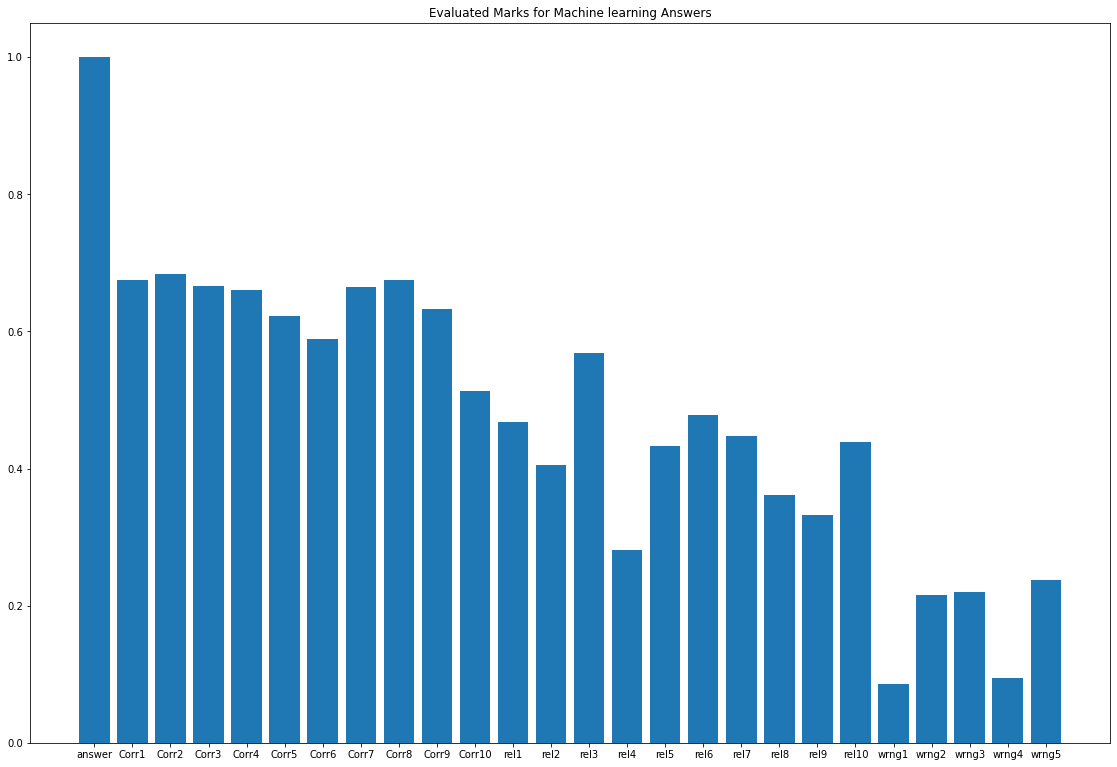

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,1,2.5,2.5])
ax.set_title('Evaluated Marks for Machine learning Answers')
answer = ['answer',
          'Corr1', 'Corr2', 'Corr3', 'Corr4', 'Corr5','Corr6', 'Corr7', 'Corr8', 'Corr9', 'Corr10',
          'rel1', 'rel2', 'rel3', 'rel4', 'rel5','rel6', 'rel7', 'rel8', 'rel9', 'rel10',
          'wrng1', 'wrng2', 'wrng3', 'wrng4', 'wrng5'

          ]
scores = final_score_ml
ax.bar(answer,scores)
plt.show()

In [104]:
final_score_java = (0.2 * (np.array(skill_score_java)/100)) + (0.8 * np.array(bert_score_java))
final_score_java

array([1.  , 0.74, 0.58, 0.55, 0.7 , 0.71, 0.69, 0.7 , 0.59, 0.67, 0.73,
       0.63, 0.56, 0.39, 0.45, 0.53, 0.44, 0.64, 0.57, 0.35, 0.48, 0.08,
       0.14, 0.25, 0.04, 0.24])

In [72]:
# [1.  , 0.68, 0.68, 0.67, 0.66, 0.62, 0.59, 0.66, 0.68, 0.63, 0.51,
#        0.47, 0.4 , 0.57, 0.28, 0.43, 0.48, 0.45, 0.36, 0.33, 0.44, 0.09,
#        0.22, 0.22, 0.1 , 0.24]

In [73]:
import numpy as np
np.average([0.04, 0.23, 0.15, 0.09, 0.06])

0.11400000000000002

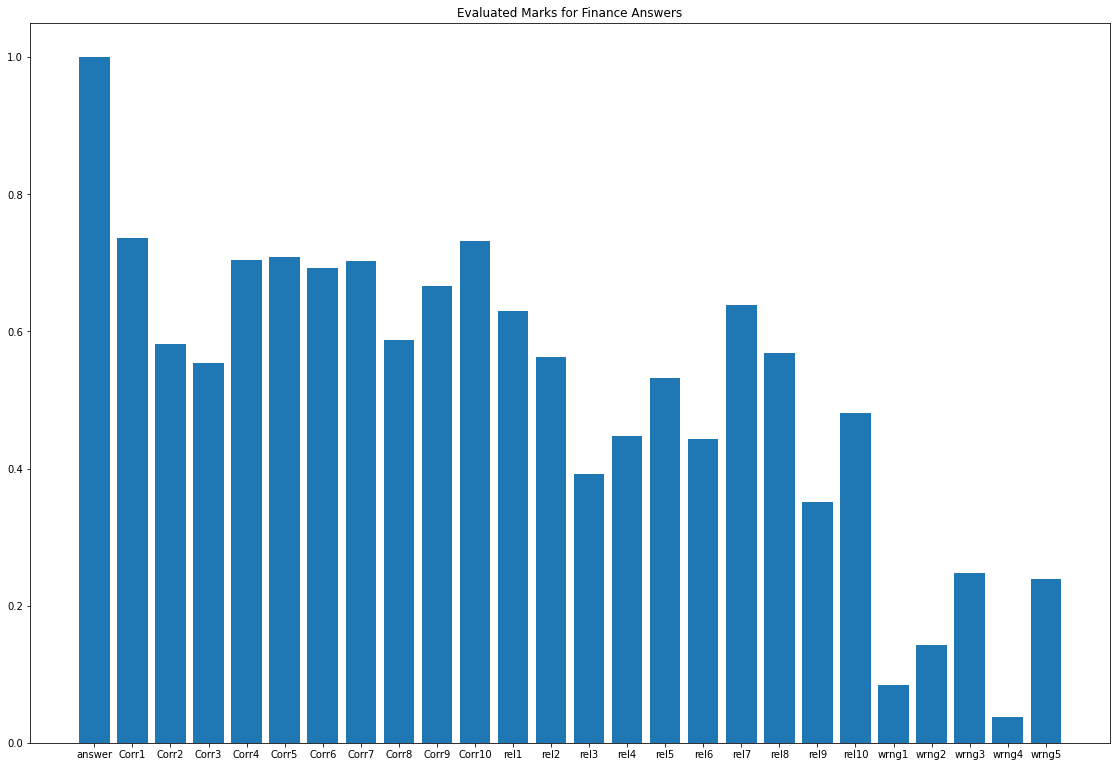

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,1,2.5,2.5])
ax.set_title('Evaluated Marks for Finance Answers')
answer = ['answer',
          'Corr1', 'Corr2', 'Corr3', 'Corr4', 'Corr5','Corr6', 'Corr7', 'Corr8', 'Corr9', 'Corr10',
          'rel1', 'rel2', 'rel3', 'rel4', 'rel5','rel6', 'rel7', 'rel8', 'rel9', 'rel10',
          'wrng1', 'wrng2', 'wrng3', 'wrng4', 'wrng5'

          ]
scores = final_score_java
ax.bar(answer,scores)
plt.show()

### Trying to improve the model performance V1.1.0

In [6]:
!pip install -U sentence-transformers

Processing /root/.cache/pip/wheels/fc/89/43/f2f5bc00b03ef9724b0f6254a97eaf159a4c4ddc024b33e07a/sentence_transformers-0.3.9-cp36-none-any.whl
  Found existing installation: sentence-transformers 0.2.0
    Uninstalling sentence-transformers-0.2.0:
      Successfully uninstalled sentence-transformers-0.2.0


In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [8]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

In [9]:
sentence_embeddings.shape

(3, 768)

#### Model Training from scratch

In [10]:
from sentence_transformers import models

In [12]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

### Plotting Normal Distribution

In [106]:
#Correct
data_c = [0.6 , 0.6 , 0.6 , 0.63, 0.58, 0.72, 
        0.68, 0.68, 0.67, 0.66, 0.62, 0.59, 0.66, 0.68, 0.63, 0.51,
        0.52, 0.4 , 0.58, 0.68, 0.64, 0.52, 0.47, 0.71, 0.62, 0.54,
        0.74, 0.58, 0.55, 0.7 , 0.71, 0.69, 0.7 , 0.59, 0.67, 0.73
        ]
len(data_c)

36

In [127]:
# data_c

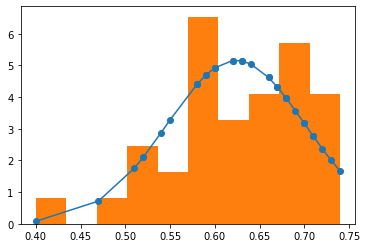

In [126]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(data_c)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

pl.show()

In [107]:
#Related
data_r = [0.55, 0.33, 0.3 , 0.49, 0.36, 0.42,
        0.47, 0.4 , 0.57, 0.28, 0.43, 0.48, 0.45, 0.36, 0.33, 0.44,
        0.5 , 0.36, 0.47, 0.44, 0.54, 0.58, 0.54, 0.48, 0.4 , 0.39,
        0.63, 0.56, 0.39, 0.45, 0.53, 0.44, 0.64, 0.57, 0.35, 0.48
        ]
len(data_r)

36

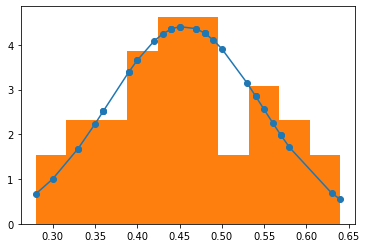

In [123]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(data_r)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

pl.show()                   #use may also need add this 

In [124]:
# # importig pyplot as plt 
# import matplotlib.pyplot as plt

# # plotting histograph 
# plt.hist(data_r, bins = 10) 
  
# # showing hte graph 
# plt.show() 

In [108]:
#Incorrect
data_i = [0.04, 0.23, 0.15, 0.09, 0.06, 
        0.09, 0.22, 0.22, 0.1 , 0.24,
        0.08, 0.21, 0.18, 0.07, 0.14,
        0.08, 0.14, 0.25, 0.04, 0.24
        ]
len(data_i)

20

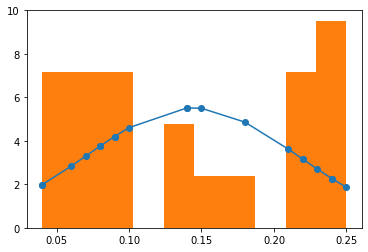

In [125]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(data_i)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

pl.show()